# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

City_name_list=[]
Lat_list=[]
Lng_list=[]
Max_Temp_list=[]
Humidity_list=[]
Cloud_list=[]
Wind_Speed_list=[]
Country_list=[]
Date_list=[]
cntr=0
ex_cntr=0
print('Beginning Data Retrieval')
for city in cities :
    response=requests.get(query_url + city).json()
    #city_name=
    try:
        City_name_list.append(response['name'])
        Lat_list.append(response['coord']['lat'])
        Lng_list.append(response['coord']['lon'])
        Max_Temp_list.append(response['main']['temp_max'])
        Humidity_list.append(response['main']['humidity'])
        Cloud_list.append(response['clouds']['all'])
        Wind_Speed_list.append(response['wind']['speed'])
        Country_list.append(response['sys']['country'])
        Date_list.append(response['dt'])
        cntr=cntr+1
        print(f'Processing Record {cntr} | {city}')
    except:
        print("That record does not exist, searching for next record...")
        ex_cntr=ex_cntr+1
print(f'Number of records processed:{cntr}')
print(f'Number of records that does not exist:{ex_cntr}')

Beginning Data Retrieval
Processing Record 1 | qaqortoq
Processing Record 2 | tiksi
Processing Record 3 | port-aux-francais
Processing Record 4 | bacalar
Processing Record 5 | brattleboro
Processing Record 6 | blackmans bay
Processing Record 7 | bethel
Processing Record 8 | colares
Processing Record 9 | edinburgh of the seven seas
Processing Record 10 | hasaki
Processing Record 11 | grytviken
Processing Record 12 | udachny
Processing Record 13 | nuku'alofa
Processing Record 14 | palmer
Processing Record 15 | enewetak
Processing Record 16 | yellowknife
Processing Record 17 | stanley
That record does not exist, searching for next record...
Processing Record 18 | alice springs
Processing Record 19 | avarua
Processing Record 20 | anadyr
Processing Record 21 | kenai
Processing Record 22 | chibougamau
Processing Record 23 | invercargill
Processing Record 24 | bikenibeu village
Processing Record 25 | san rafael del yuma
Processing Record 26 | aripuana
Processing Record 27 | severo-yeniseyskiy

Processing Record 228 | lautoka
Processing Record 229 | kaliua
Processing Record 230 | salahonda
Processing Record 231 | urangan
Processing Record 232 | champerico
Processing Record 233 | mugia
Processing Record 234 | dudinka
Processing Record 235 | sebastopol
Processing Record 236 | dzhambeyty
Processing Record 237 | ventspils
Processing Record 238 | rawson
Processing Record 239 | bodo
Processing Record 240 | sukumo
Processing Record 241 | san cristobal
Processing Record 242 | demopolis
Processing Record 243 | fontanelas
Processing Record 244 | kalabo
Processing Record 245 | christchurch
Processing Record 246 | pemangkat
Processing Record 247 | port alberni
Processing Record 248 | mahriz
Processing Record 249 | hithadhoo
Processing Record 250 | quatre cocos
Processing Record 251 | mykhaylivka
Processing Record 252 | dwarka
Processing Record 253 | longyearbyen
Processing Record 254 | acarau
Processing Record 255 | chagoda
Processing Record 256 | mount isa
Processing Record 257 | mejit


Processing Record 459 | coahuayana de hidalgo
Processing Record 460 | san pedro
Processing Record 461 | ad dabbah
Processing Record 462 | ulsteinvik
Processing Record 463 | pelabuhanratu
Processing Record 464 | da lat
Processing Record 465 | vilyuysk
Processing Record 466 | luanda
Processing Record 467 | ciudad delicias
Processing Record 468 | praia da vitoria
Processing Record 469 | yusufeli
Processing Record 470 | xindian
Processing Record 471 | saint-philippe
Processing Record 472 | nishinoomote
Processing Record 473 | broken hill
Processing Record 474 | nuriootpa
Processing Record 475 | bargaal
Processing Record 476 | midvagur
Processing Record 477 | aasiaat
Processing Record 478 | bugojno
Processing Record 479 | fajardo
Processing Record 480 | majene
Processing Record 481 | igarka
Processing Record 482 | saint croix
Processing Record 483 | sabha
Processing Record 484 | nuuk
Processing Record 485 | pudozh
Processing Record 486 | sosnovo-ozerskoye
Processing Record 487 | t'aebaek
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame

# Count data
weather_dict = pd.DataFrame({ 
                "City" : City_name_list,
                "Cloudiness" : Cloud_list,
                "Country" : Country_list,
                "Date" : Date_list,
                "Humidity" : Humidity_list,
                "Lat" : Lat_list,
                "Lng" : Lng_list,
                "Max Temp" : Max_Temp_list,
                "Wind Speed" : Wind_Speed_list
})
weather_dict.count()


City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [5]:
# Display sample data
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaqortoq,76,GL,1692247521,90,60.7167,-46.0333,43.83,2.24
1,Tiksi,100,RU,1692247521,91,71.6872,128.8694,37.89,7.87
2,Port-aux-Français,81,TF,1692247522,78,-49.3500,70.2167,36.05,43.91
3,Bacalar,26,MX,1692247522,91,18.6667,-88.3833,78.37,3.91
4,Brattleboro,71,US,1692247523,91,42.8509,-72.5579,70.21,3.00
...,...,...,...,...,...,...,...,...,...
571,Gavrilov-Yam,9,RU,1692247934,66,57.3018,39.8533,64.24,3.62
572,Kenora,100,CA,1692247935,88,49.8167,-94.4337,59.97,16.11
573,Sierra Grande,100,AR,1692247756,80,-41.6060,-65.3557,42.98,15.37
574,Beryozovo,66,RU,1692247936,58,63.9381,65.0419,74.48,5.32


In [6]:


#Export DataFrame to CSV File
weather_dict.to_csv("output_data/cities.csv", index = False)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

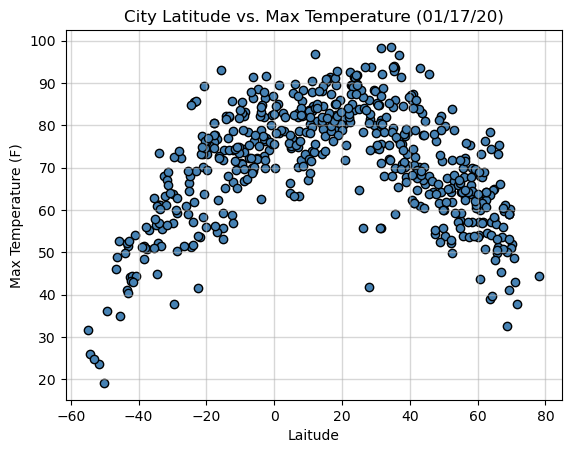

In [7]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature.png")

#### Latitude Vs. Humidity

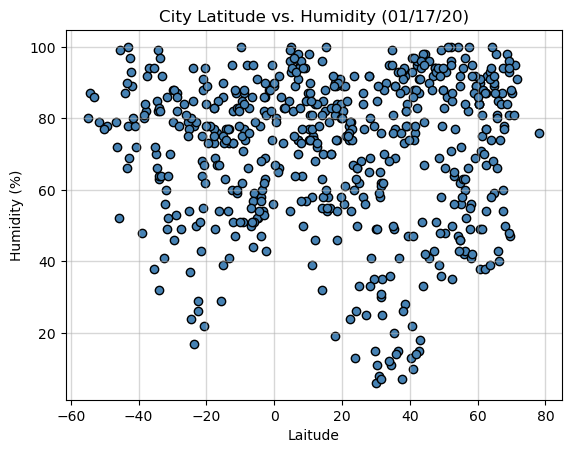

In [8]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity.png")

#### Latitude Vs. Cloudiness

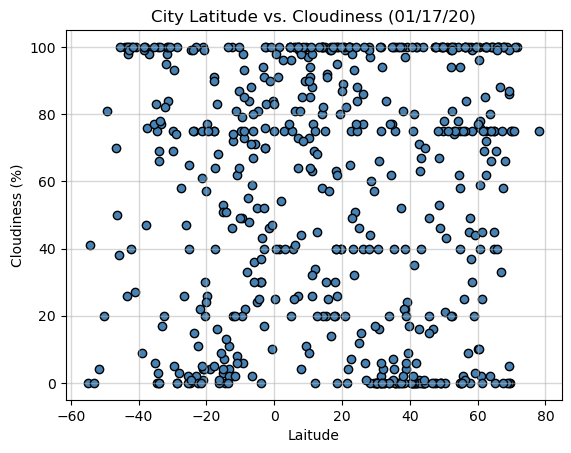

In [9]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

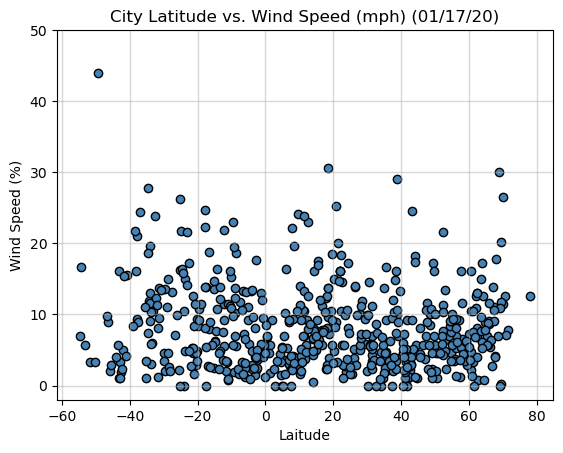

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed (mph).png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
northern_df = weather_dict.loc[pd.to_numeric(weather_dict["Lat"]).astype(float) > 0, :]
southern_df = weather_dict.loc[pd.to_numeric(weather_dict["Lat"]).astype(float) < 0, :]

###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.42x + 88.42
The r-squared is: -0.6733323951343217
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


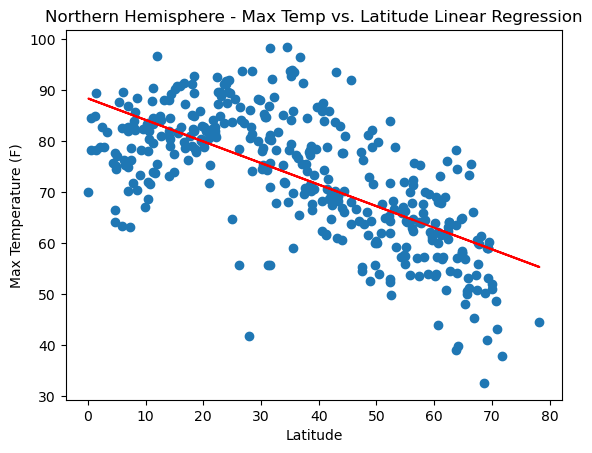

<Figure size 640x480 with 0 Axes>

In [12]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("Northren hemisphere temp vs lat.png")

Regression line equation is: y = 0.74x + 82.6
The r-squared is: 0.7911028270024576
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


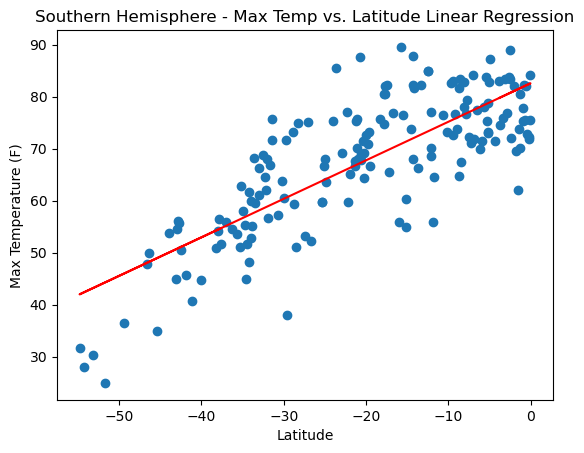

<Figure size 640x480 with 0 Axes>

In [99]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()
plt.savefig("Southern hemisphere lat vs max temp.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.06x + 74.49
The r-squared is: -0.05397423129544836
The regression does not display much of a correlation between the data sets.


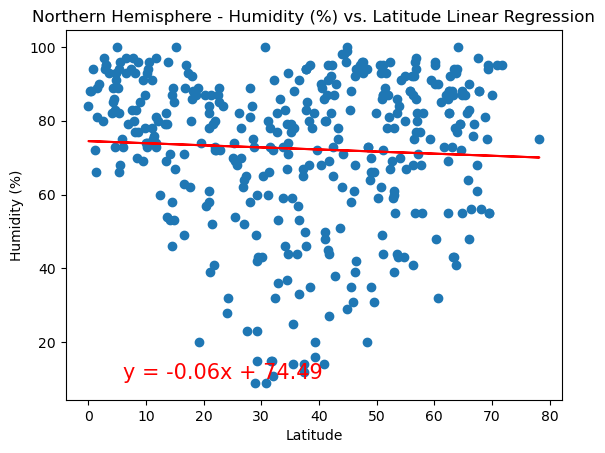

<Figure size 640x480 with 0 Axes>

In [100]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

Regression line equation is: y = -0.02x + 71.56
The r-squared is: -0.020485742177121857
The regression does not display much of a correlation between the data sets.


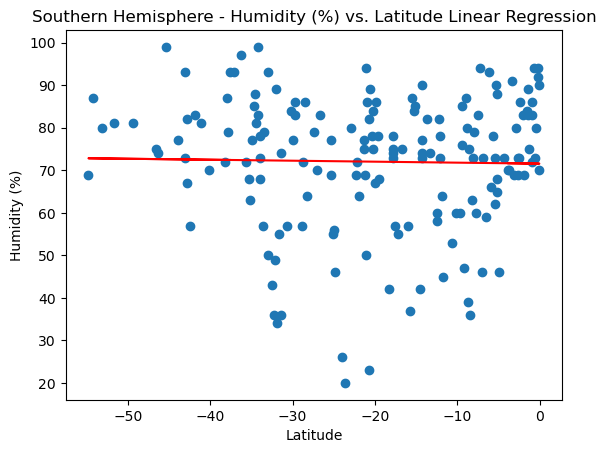

<Figure size 640x480 with 0 Axes>

In [101]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.31x + 67.03
The r-squared is: -0.1512321147065109
The regression does not display much of a correlation between the data sets.


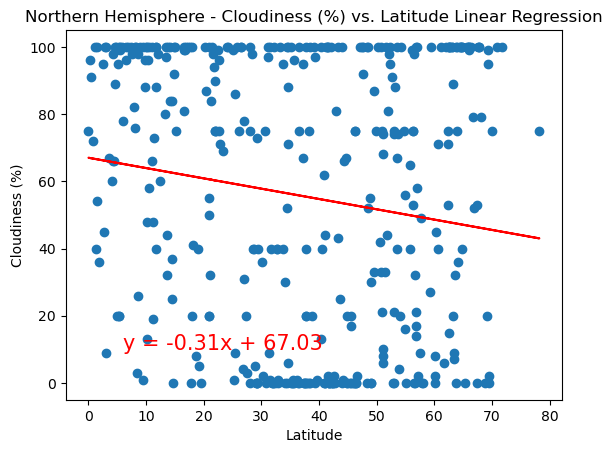

<Figure size 640x480 with 0 Axes>

In [102]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

Regression line equation is: y = -0.43x + 45.15
The r-squared is: -0.15958860218095858
The regression does not display much of a correlation between the data sets.


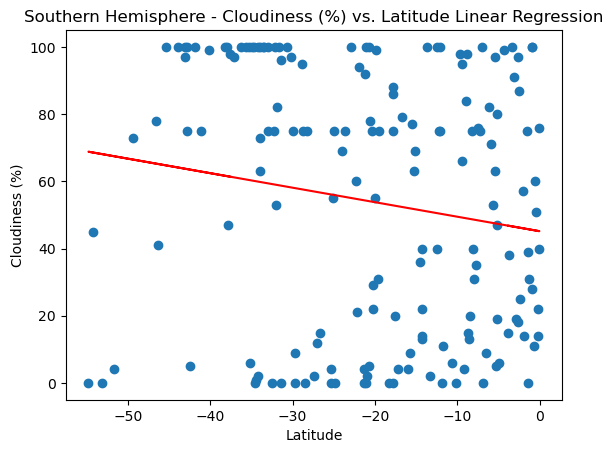

<Figure size 640x480 with 0 Axes>

In [104]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.0x + 7.15
The r-squared is: -0.019665267098204472
The regression does not display much of a correlation between the data sets.


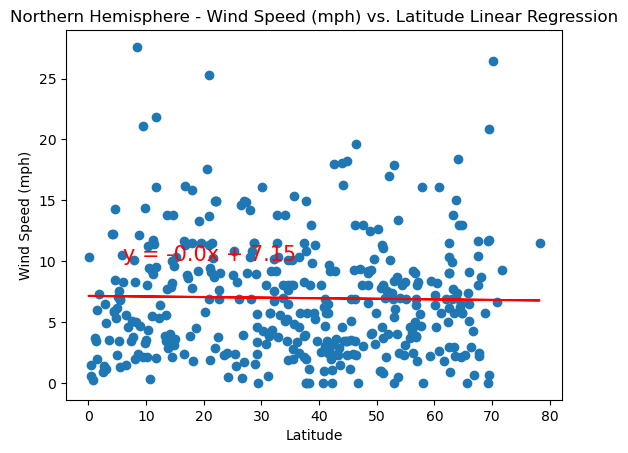

<Figure size 640x480 with 0 Axes>

In [105]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Northern Hemisphere - Wind speed vs. Latitude Linear Regression.png")

Regression line equation is: y = -0.05x + 7.21
The r-squared is: -0.12249229480332166
The regression does not display much of a correlation between the data sets.


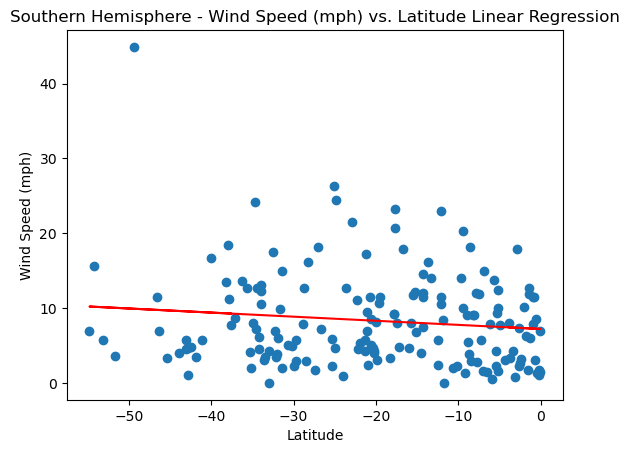

<Figure size 640x480 with 0 Axes>

In [106]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig("Southern Hemisphere - wind speed vs. Latitude Linear Regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE